In [7]:
import uproot
# import ROOT
import matplotlib.pyplot as plt

In [2]:
%%bash 
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --verbose 2 &> outputV1.log

In [4]:
%%bash 
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=0 -n fixed_pdf_0 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=1 -n fixed_pdf_1 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=2 -n fixed_pdf_2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1


 <<< Combine >>> 
 <<< v10.0.1 >>>
>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Set Range of Parameter r To : (-10,10)
Set Default Index of Parameter pdf_index To : 0 (was: 0 )
Doing initial fit: 
 POI: r= 2.03829 -> [-10,10]
Point 0/50 r = -9.8
Point 1/50 r = -9.4
Point 2/50 r = -9
Point 3/50 r = -8.6
Point 4/50 r = -8.2
Point 5/50 r = -7.8
Point 6/50 r = -7.4
Point 7/50 r = -7
Point 8/50 r = -6.6
Point 9/50 r = -6.2
Point 10/50 r = -5.8
Point 11/50 r = -5.4
Point 12/50 r = -5
Point 13/50 r = -4.6
Point 14/50 r = -4.2
Point 15/50 r = -3.8
Point 16/50 r = -3.4
Point 17/50 r = -3
Point 18/50 r = -2.6
Point 19/50 r = -2.2
Point 20/50 r = -1.8
Point 21/50 r = -1.4
Point 22/50 r = -1
Point 23/50 r = -0.6
Point 24/50 r = -0.2
Point 25/50 r = 0.2
Point 26/50 r = 0.6
Point 27/50 r = 1
Point 28/50 r = 1.4
Point 29/50 r = 1.8
Point 30/50 r = 2.2
Point 31/50 r = 2.6
Point 32/50 r = 3
Point 33/50 r = 3.4
Point 34/50 r = 3.8
Point 35/50 r = 4.2
Point 36/50 r = 4.6
Poin

In [5]:
def getRandNLL(load_path: str):
    file = uproot.open(load_path)
    nll = file['limit']['nll'].array()
    nll0 = file['limit']['nll0'].array()
    deltaNLL = file['limit']['deltaNLL'].array()
    y_arr = 2*(deltaNLL + nll0 + nll)[1:]
    # y_arr = 2*(deltaNLL)[1:]
    x_arr = file['limit']['r'].array()[1:]
    # print(f"file['limit']['r']: {file['limit']['r'].array()}")
    return x_arr, y_arr

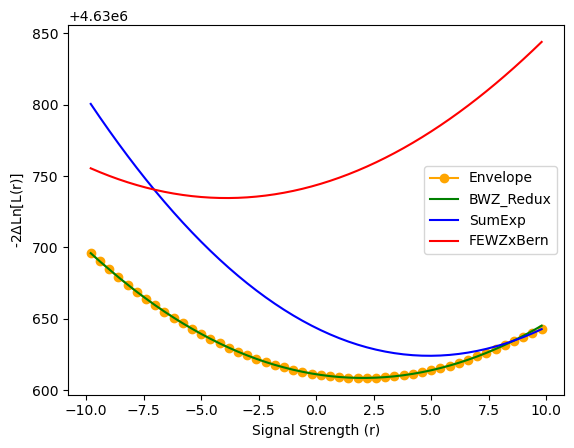

In [8]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "PowerLaw": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "BWZxBern": "./higgsCombinefixed_pdf_3.MultiDimFit.mH125.root",
}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    # print(f"x_arr: {(x_arr)}")
    # print(f"y_arr: {y_arr}")
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [52]:
import ROOT as rt
f = rt.TFile("./combine_test_datacard.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("w")

TFile**		./combine_test_datacard.root	
 TFile*		./combine_test_datacard.root	
  KEY: RooWorkspace	w;1	w
  KEY: TProcessID	ProcessID0;1	0b98ba46-3efe-11ef-b9b5-900b050abeef


In [54]:
# ws.Print()
ws.var("r").Print("v")

--- RooAbsArg ---
  Value State: clean
  Shape State: clean
  Attributes:  [SnapShot_ExtRefClone,group_POI] 
  Address: 0x560bd44083d0
  Clients: 
    (0x560bd4407d10,V-) ProcessNormalization::n_exp_bindimuon_mass_proc_signal ""
  Servers: 
  Proxies: 
--- RooAbsReal ---

  Plot label is "r"
--- RooAbsRealLValue ---
  Fit range is [ 0 , 20 ]
--- RooRealVar ---
  Error = 0


In [61]:
import ROOT as rt
f = rt.TFile("./higgsCombineTest.MarkovChainMC.mH120.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("limit")


TFile**		./higgsCombineTest.MarkovChainMC.mH120.root	
 TFile*		./higgsCombineTest.MarkovChainMC.mH120.root	
  KEY: TDirectoryFile	toys;1	toys
  KEY: TTree	limit;1	limit


In [62]:
ws.Print()

******************************************************************************
*Tree    :limit     : limit                                                  *
*Entries :        0 : Total =            5326 bytes  File  Size =        790 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :limit     : limit/D                                                *
*Entries :        0 : Total  Size=        493 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :limitErr  : limitErr/D                                             *
*Entries :        0 : Total  Size=        505 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [111]:
FEWZ_file = rt.TFile("../data//NNLO_Bourilkov_2017.root", "READ")
FEWZ_file.ls()

TFile**		../data//NNLO_Bourilkov_2017.root	
 TFile*		../data//NNLO_Bourilkov_2017.root	
  KEY: TH1D	full_xsec;1	full_xsec
  KEY: TH1D	full_36fb;1	full_36fb
  KEY: TH1D	full_shape;1	full_shape
  KEY: TH1D	cc_xsec;1	cc_xsec
  KEY: TH1D	cc_36fb;1	cc_36fb
  KEY: TH1D	cc_shape;1	cc_shape
  KEY: TH1D	ncnc_xsec;1	ncnc_xsec
  KEY: TH1D	ncnc_36fb;1	ncnc_36fb
  KEY: TH1D	ncnc_shape;1	ncnc_shape
  KEY: TH1D	one_jet_xsec;1	one_jet_xsec
  KEY: TH1D	one_jet_36fb;1	one_jet_36fb
  KEY: TH1D	one_jet_shape;1	one_jet_shape
  KEY: TH1D	two_jet_xsec;1	two_jet_xsec
  KEY: TH1D	two_jet_36fb;1	two_jet_36fb
  KEY: TH1D	two_jet_shape;1	two_jet_shape


In [112]:
FEWZ_histo_36fb = FEWZ_file.Get("full_36fb")
FEWZ_histo_36fb.Print("v")
FEWZ_histo_full_xsec = FEWZ_file.Get("full_xsec")
FEWZ_histo_full_xsec.Print("v")
FEWZ_histo_full_shape = FEWZ_file.Get("full_shape")
FEWZ_histo_full_shape.Print("v")

TH1.Print Name  = full_36fb, Entries= 50, Total sum= 476441
TH1.Print Name  = full_xsec, Entries= 50, Total sum= 13.2345
TH1.Print Name  = full_shape, Entries= 50, Total sum= 1


In [113]:
# FEWZ_histo = FEWZ_histo_36fb
# FEWZ_histo = FEWZ_histo_full_shape
import numpy as np
def getFEWZ_vals(FEWZ_histo):
    n_points = FEWZ_histo.GetNbinsX()
    x_vals = []
    y_vals = []
    for i in range(n_points):
        if i<0 or i >=42:
            continue
        if (FEWZ_histo.GetBinCenter(i)) < 110.0:
            x_vals.append(110.0)
            y_vals.append(FEWZ_histo.GetBinContent(i+1)*1.05) 
            continue
        if (FEWZ_histo.GetBinCenter(i)) >150:
            x_vals.append(150.0)
            y_vals.append(FEWZ_histo.GetBinContent(i)*0.95)  
            continue
        x_vals.append(FEWZ_histo.GetBinCenter(i))
        y_vals.append(FEWZ_histo.GetBinContent(i))
    return (np.array(x_vals), np.array(y_vals))

In [114]:
x_vals, y_vals = getFEWZ_vals(FEWZ_histo_full_shape)
print(x_vals)
print(y_vals)

[110.  110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5 120.5
 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5 132.5
 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5 144.5
 145.5 146.5 147.5 148.5 149.5 150. ]
[0.06888883 0.06560841 0.05985101 0.05407571 0.05001306 0.04578032
 0.0427122  0.03935657 0.03652706 0.03408782 0.03229583 0.02998172
 0.02769406 0.02642185 0.02475544 0.02336045 0.02238799 0.02100063
 0.02014974 0.01899276 0.01808521 0.01708502 0.01664578 0.01576014
 0.01485364 0.0141665  0.01393876 0.01325116 0.01268733 0.01220556
 0.0116554  0.01108455 0.01086104 0.01035282 0.00991412 0.00976164
 0.00960334 0.00908779 0.00881902 0.00833113 0.00803085 0.00780209]


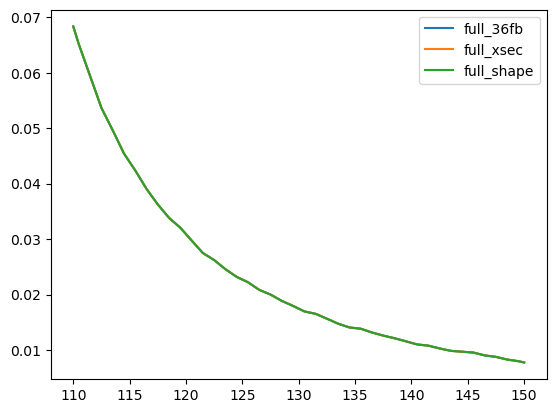

In [115]:
histo_l = [
    FEWZ_histo_36fb,
    FEWZ_histo_full_xsec,
    FEWZ_histo_full_shape,
]
for histo in histo_l:
    x_vals, y_vals = getFEWZ_vals(histo)
    y_vals = y_vals / np.sum(y_vals)
    plt.plot(x_vals, y_vals, label = histo.GetName())
plt.legend(loc="upper right")
plt.show()

In [94]:
str(FEWZ_histo_36fb.GetName())

'full_36fb'

In [75]:
%%bash
combine -M Significance -d combine_test_datacard_long.txt -m 125 -n _signif_cat0_ggh --cminDefaultMinimizerStrategy=0 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index=0 --cminRunAllDiscreteCombinations --setParameterRanges r=-10,10 --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.1 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH --verbose 3


>>> Random number generator seed is 123456
>>> Method used is Significance
Turning on runtime-define FITTER_NEWER_GIVE_UP
Turning on runtime-define FITTER_BOUND
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999
Turning on runtime-define FAST_VERTICAL_MORPH


Will make a binned dataset
Observables: ['dimuon_mass']
Will use category 'CMS_channel' to identify the 1 channels
Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s
Importing combined pdf model_b



RooWorkspace(w) w contents

variables
---------
(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,CMS_channel,FEWZxBern_Bernstein_c_1,FEWZxBern_Bernstein_c_2,FEWZxBern_Bernstein_c_3,MH,SMF_Order3_Coeff1,SMF_Order3_Coeff2,SMF_Order3_Coeff3,S_exp_a_1,S_exp_b_0,S_exp_b_1,alpha1,alpha2,dimuon_mass,lumi_13TeV_,lumi_13TeV__In,n1,n2,n_exp_bindimuon_mass_proc_background,pdf_index,r,shapeBkg_background_dimuon_mass__norm,shapeSig_signal_dimuon_mass__norm,sigma)

p.d.f.s
-------
RooSimultaneousOpt::model_b[ indexCat=CMS_channel dimuon_mass=pdf_bindimuon_mass_bonly extraConstraints=() channelMasks=() ] = 1.24781e-05
  RooProdPdf::pdf_bindimuon_mass_bonly[ lumi_13TeV__Pdf * pdf_bindimuon_mass_bonly_nuis * pdfbins_bindimuon_mass ] = 1.24781e-05
    SimpleGaussianConstraint::lumi_13TeV__Pdf[ x=lumi_13TeV_ mean=lumi_13TeV__In sigma=1 ] = 1
    RooAddPdf::pdf_bindimuon_mass_bonly_nuis[ n_exp_final_bindimuon_mass_proc_background * shapeBkg_background_dimuon_mass ] = 1.24781e-05/1
      RooMultiPdf

Setting variable 'MH' in workspace to the mass 125


Set Range of Parameter r To : (-10,10)
Set Default Index of Parameter pdf_index To : 0 (was: 0 )
Found a parameter named shapeSig_signal_dimuon_mass__norm infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named MH infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named n_exp_bindimuon_mass_proc_background infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
Adding discrete pdf_index 
Saving snapshot 'clean'
Saved snapshot 'clean'
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_BWZ_Redux_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minimization configured w

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =      0.7949653999 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 0.7949653999
  Internal parameters:	[     -1.030262793    -0.1744516006     0.1132643743                0    -0.3398369095]	
  Internal gradient  :	[     -15.99337054      369.4173451      1917.538996    -0.3066946643      463.0777712]	
  Internal covariance matrix:
[[  0.00015598986              0              0              0              0]
 [              0  4.0898404e-07              0              0              0]
 [              0              0  7.4910122e-07              0              0]
 [              0              0              0    0.040800371              0]
 [              0              0              0              0  1.5197547e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start i

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33.5347686596362422
Edm   = 7.62741123286129726e-05
Nfcn  = 89
BWZ_Redux_a_coeff	  = -0.0181437	 +/-  0.000206821	(limited)
BWZ_Redux_b_coeff	  = -0.000190988	 +/-  2.19942e-06	(limited)
BWZ_Redux_c_coeff	  = 0.394102	 +/-  0.0212134	(limited)
lumi_13TeV_	  = 0.0121634	 +/-  0.996099	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658249	 +/-  806.018	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_S_exp_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =        2.83954654 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 2.83954654
  Internal parameters:	[      1.185627643     0.2858757894     0.2743848067                0    -0.3398369095]	
  Internal gradient  :	[     -33.78835763     -10025.90585      -742.891485    -0.2457555947      461.9702189]	
  Internal covariance matrix:
[[   0.0028590065              0              0              0              0]
 [              0  1.3256532e-08              0              0              0]
 [              0              0  1.1659481e-05              0              0]
 [              0              0              0    0.040795493              0]
 [              0              0              0              0  1.5203755e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start ite

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2.91723625502571515
Edm   = 2.5893858812085328e-05
Nfcn  = 73
S_exp_a_1	  = 0.966791	 +/-  0.00601956	(limited)
S_exp_b_0	  = -0.0774539	 +/-  0.000259982	(limited)
S_exp_b_1	  = -0.0774776	 +/-  0.00697737	(limited)
lumi_13TeV_	  = 0.0361284	 +/-  0.996882	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658251	 +/-  808.991	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_FEWZxBern_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       31.54576975 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 31.54576975
  Internal parameters:	[     0.0768661998     0.0507524469    0.02307858275                0    -0.3398369095]	
  Internal gradient  :	[      2971.799596     -12237.49805     -28671.23483     0.5390473402      447.4769547]	
  Internal covariance matrix:
[[  2.2782058e-06              0              0              0              0]
 [              0  3.7722411e-07              0              0              0]
 [              0              0  5.9917508e-08              0              0]
 [              0              0              0    0.040767081              0]
 [              0              0              0              0  1.5220421e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start it

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -47.573231979225902
Edm   = 1.51446826919506403e-05
Nfcn  = 69
FEWZxBern_Bernstein_c_1	  = 0.12866	 +/-  0.0031686	(limited)
FEWZxBern_Bernstein_c_2	  = 0.114178	 +/-  0.00161758	(limited)
FEWZxBern_Bernstein_c_3	  = 0.044725	 +/-  0.000530896	(limited)
lumi_13TeV_	  = -0.0313418	 +/-  0.996401	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658252	 +/-  812.84	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =   0.0001180206454 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 0.0001180206454
  Internal parameters:	[       -1.1830116    -0.1921682643     0.0789022415   0.001737624232    -0.3401851805]	
  Internal gradient  :	[      1.096521147     -12.59904043      1.452755073    0.03651173314    -0.3049397718]	
  Internal covariance matrix:
[[  0.00029087392              0              0              0              0]
 [              0  4.1571732e-07              0              0              0]
 [              0              0  8.6239794e-07              0              0]
 [              0              0              0     0.04080502              0]
 [              0              0              0              0  1.5169105e-06]]]
Info in <Minuit2>: VariableMetricBuilder Star

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.284761751704106003
Edm   = 8.97909791102390144e-06
Nfcn  = 391
BWZ_Redux_a_coeff	  = -0.0199948	 +/-  0.000581867	(limited)
BWZ_Redux_b_coeff	  = -0.000185431	 +/-  2.97569e-06	(limited)
BWZ_Redux_c_coeff	  = 0.381439	 +/-  0.0190171	(limited)
lumi_13TeV_	  = 0.00800025	 +/-  0.980994	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658249	 +/-  811.189	(limited)
Minimization finished with status=0
Minimization success! status=0
[WARNING] Found parameter BWZ_Redux_a_coeff at boundary (within ~1sigma): -0.0199948+/-0.000581867
[WARNING] After fit, some parameters are found at the boundary (within ~1sigma)
Nuisance parameters after fit for asimov dataset: 
  1) RooRealVar:: lumi_13TeV_ = 0.00800025 +/- 0.980994
Parameters after fit for asimov dataset
BWZ_Redux_a_coeff = -0.0199948 
BWZ_Redux_b_coeff = -0.000185431 
BWZ_Redux_c_coeff = 0.381439 
FEWZxBern_Bernstein_c_1 = 0.153581 
FEWZxBern_Bernstein_c_2 = 0.101461 
FEWZxBern_Ber

In [ ]:
    """
    simultaneous  fit results from stage2ToSMF_fitV2.py
    """

In [79]:
%%bash
combine -M Significance -d test_datacardV2.txt -m 125 -n _signif_cat0_ggh --cminDefaultMinimizerStrategy=0 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index=0 --cminRunAllDiscreteCombinations --setParameterRanges r=-10,10 --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.1 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH --verbose 3


>>> Random number generator seed is 123456
>>> Method used is Significance
Turning on runtime-define FITTER_NEWER_GIVE_UP
Turning on runtime-define FITTER_BOUND
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999
Turning on runtime-define FAST_VERTICAL_MORPH


Will make a binned dataset
Observables: ['mh_ggh']
Will use category 'CMS_channel' to identify the 1 channels
Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s
Importing combined pdf model_b



RooWorkspace(w) w contents

variables
---------
(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,CMS_channel,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,lumi_13TeV_In,mh_ggh,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,pdf_index_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0)

p.d.f.s
-------
RooSimultaneousOpt::model_b[ indexCat=CMS_channel mh_ggh=pdf_binmh_ggh_bonly extraConstraints=() channelMasks=() ] = 0.00010013
  RooProdPdf::pdf_binmh_ggh_bonly[ lumi_13TeV_Pdf * pdf_binmh_ggh_bonly_nuis * pdfbins_binmh_ggh ] = 0.00010013
    SimpleGaussianConstraint::lumi_13TeV_Pdf[ x=lumi_13TeV mean=lumi_13TeV_In sigma=1 ] = 1
    RooAddPdf::pdf_binmh_ggh_bonly_nuis[ n_exp_final_binmh_ggh_proc_CorePdf_subCat0 * shapeBkg_CorePdf_subCat0_mh_ggh ] = 0.00010013/1
      Roo

Setting variable 'MH' in workspace to the mass 125


Set Range of Parameter r To : (-10,10)
Found a parameter named shapeSig_signal_subCat0_mh_ggh__norm infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named MH infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named n_exp_binmh_ggh_proc_CorePdf_subCat0 infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
Adding discrete pdf_index_subCat0 
Saving snapshot 'clean'
Saved snapshot 'clean'
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_BWZ_Redux_X_subCat0_SMF]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =        76.8445766 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 76.8445766
  Internal parameters:	[    -0.3097551648    -0.1839904947     0.1039896522     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[      10.45442812      877.0095344       1789.26114     -99.81234949      4994.832428     -5827.084911    -0.3657763406      464.1688707]	
  Internal covariance matrix:
[[   4.538942e-05              0              0              0              0              0              0              0]
 [              0  4.1004674e-07              0              0              0              0              0              0]
 [              0              0  7.6302977e-07              0              0              0     

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -65.778248251601795
Edm   = 1.66197620011416809e-05
Nfcn  = 1134
BWZ_Redux_a_coeff	  = 0.00301131	 +/-  0.00195997	(limited)
BWZ_Redux_b_coeff	  = -5.18921e-05	 +/-  7.01014e-05	(limited)
BWZ_Redux_c_coeff	  = 2.56801	 +/-  1.00769	(limited)
a0_subCat0	  = 0.774411	 +/-  0.160169	(limited)
a1_subCat0	  = 0.114058	 +/-  0.0030388	(limited)
a3_subCat0	  = 0.00895345	 +/-  0.00688749	(limited)
lumi_13TeV	  = -0.0160752	 +/-  0.993745	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658251	 +/-  811.04	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_sumExp_X_subCat0_SMF_sumExp]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       73.98809575 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 73.98809575
  Internal parameters:	[     0.2945837078     0.9694850244      1.552004856     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -11361.54861     0.1853791937      -87.1538041     -695.9257432      5847.526024     -4444.829513    -0.3870685488      464.5802554]	
  Internal covariance matrix:
[[  1.2498329e-08              0              0              0              0              0              0              0]
 [              0     0.60906407              0              0              0              0              0              0]
 [              0              0  0.00018340736              0              0              0    

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1.47035) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.941961	RooSumTwoExpPdf_a2_coeff=-0.755091	RooSumTwoExpPdf_f_coeff=0.298511	a0_subCat0=0.379644	a1_subCat0=0.276496	a3_subCat0=-0.993589	lumi_13TeV=2.52101	shapeBkg_CorePdf_subCat0_mh_ggh__norm=74479.4
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.001

Info in <Minuit2>: VariableMetricBuilder    9 - FCN =        -57.114281 Edm =       45485.67372 NCalls =    231


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.43953	RooSumTwoExpPdf_a2_coeff=-0.767286	RooSumTwoExpPdf_f_coeff=0.0377051	a0_subCat0=0.985472	a1_subCat0=0.496213	a3_subCat0=-0.54605	lumi_13TeV=2.52652	shapeBkg_CorePdf_subCat0_mh_ggh__norm=652691
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.0

Info in <Minuit2>: VariableMetricBuilder   10 - FCN =      -57.11667923 Edm =       16115.54763 NCalls =    253


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.52965	RooSumTwoExpPdf_a2_coeff=-0.785918	RooSumTwoExpPdf_f_coeff=0.390486	a0_subCat0=0.969497	a1_subCat0=0.520964	a3_subCat0=0.883976	lumi_13TeV=2.50719	shapeBkg_CorePdf_subCat0_mh_ggh__norm=960768
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.00

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Info in <Minuit2>: DavidonErrorUpdator Explanation:
   The distance from the minimum cannot be estimated, since the minimized
   function seems not to be strictly convex in the space probed by the fit.
   That is expected if the starting parameters are e.g. close to a local maximum
   of the minimized function. If this function is expected to be fully convex
   in the probed range or Minuit is already close to the function minimum, this
   may hint to numerical or analytical issues with the minimized function.
   This was found by projecting the difference of gradients at two points, s0 and p1,
   onto the direction given by the difference of s0 and p1, where:
 * s0:  	[      0.294301837     0.6790096936      1.566359588     0.3107023109     0.1467240711    -0.0122975401  -0.001024705627    -0.3401357777]	 
 * p1:  	[     0.2938748211     0.6789008443      1.54380

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.33418	RooSumTwoExpPdf_a2_coeff=-0.771946	RooSumTwoExpPdf_f_coeff=0.515692	a0_subCat0=0.908253	a1_subCat0=-0.194755	a3_subCat0=-0.60487	lumi_13TeV=2.5147	shapeBkg_CorePdf_subCat0_mh_ggh__norm=29029.3
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.0

Info in <Minuit2>: VariableMetricBuilder   12 - FCN =      -58.81118754 Edm =       15050.49688 NCalls =    296


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.728759	RooSumTwoExpPdf_a2_coeff=-0.669557	RooSumTwoExpPdf_f_coeff=0.00571458	a0_subCat0=-0.377365	a1_subCat0=-0.899266	a3_subCat0=0.608723	lumi_13TeV=2.49813	shapeBkg_CorePdf_subCat0_mh_ggh__norm=7178.02
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/-

Info in <Minuit2>: VariableMetricBuilder   13 - FCN =      -58.82463824 Edm =       1083.294987 NCalls =    317
Info in <Minuit2>: VariableMetricBuilder   14 - FCN =      -58.98517954 Edm =       52.89329383 NCalls =    337
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 2.30601 > 0
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.651059
Warning in <Minuit2>: VariableMetricBuilder gdel = -345.798


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.86195	RooSumTwoExpPdf_a2_coeff=-0.363782	RooSumTwoExpPdf_f_coeff=0.0323702	a0_subCat0=0.0832186	a1_subCat0=-0.295168	a3_subCat0=-0.917745	lumi_13TeV=2.37496	shapeBkg_CorePdf_subCat0_mh_ggh__norm=690037
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 

Info in <Minuit2>: VariableMetricBuilder   15 - FCN =      -59.18434601 Edm =       88.11884966 NCalls =    356
Info in <Minuit2>: VariableMetricBuilder   16 - FCN =       -60.0200088 Edm =       2.840159992 NCalls =    374
Info in <Minuit2>: VariableMetricBuilder   17 - FCN =      -60.04461346 Edm =       2.105456465 NCalls =    393
Info in <Minuit2>: VariableMetricBuilder   18 - FCN =      -60.05028656 Edm =        0.30153292 NCalls =    412
Info in <Minuit2>: VariableMetricBuilder   19 - FCN =      -60.39362586 Edm =     0.09339638054 NCalls =    431
Info in <Minuit2>: VariableMetricBuilder   20 - FCN =      -60.49534242 Edm =       0.140700634 NCalls =    449
Info in <Minuit2>: VariableMetricBuilder   21 - FCN =      -60.56677342 Edm =      0.1537465054 NCalls =    467
Info in <Minuit2>: VariableMetricBuilder   22 - FCN =        -60.660942 Edm =     0.04118593198 NCalls =    485
Info in <Minuit2>: VariableMetricBuilder   23 - FCN =      -60.70771966 Edm =     0.01650704816 NCalls =

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -68.561030051794873
Edm   = 6.82343700863220456e-05
Nfcn  = 1176
RooSumTwoExpPdf_a1_coeff	  = -0.0860078	 +/-  0.00482865	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.0536825	 +/-  0.057452	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.990552	 +/-  0.0120247	(limited)
a0_subCat0	  = 0.636725	 +/-  0.115251	(limited)
a1_subCat0	  = 0.181951	 +/-  0.0419324	(limited)
a3_subCat0	  = 0.00141994	 +/-  0.0135524	(limited)
lumi_13TeV	  = -0.0139603	 +/-  0.996438	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658252	 +/-  829.084	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([fewz_roospline_func_X_subCat0_SMF_FEWZxBern]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergen

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       21.16811645 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 21.16811645
  Internal parameters:	[     0.1327441762     0.0725135992     0.0388317531     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -257.4304451     -3298.441519     -5317.111817     -875.0179451     -621.7738722      3537.542831     0.1343304557      454.9516021]	
  Internal covariance matrix:
[[  4.0685919e-06              0              0              0              0              0              0              0]
 [              0  8.3494047e-07              0              0              0              0              0              0]
 [              0              0  1.5496028e-07              0              0              0    

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -22.9446411585824706
Edm   = 1.22829622565506843e-05
Nfcn  = 200
FEWZxBern_c1	  = 0.250084	 +/-  0.0320175	(limited)
FEWZxBern_c2	  = 0.130515	 +/-  0.00376714	(limited)
FEWZxBern_c3	  = 0.0792063	 +/-  0.00114403	(limited)
a0_subCat0	  = 0.309969	 +/-  0.00280732	(limited)
a1_subCat0	  = 0.142534	 +/-  0.0204174	(limited)
a3_subCat0	  = -0.0378223	 +/-  0.00666345	(limited)
lumi_13TeV	  = -0.0135242	 +/-  0.996208	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658253	 +/-  814.196	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =   4.730972723e-05 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 4.730972723e-05
  Internal parameters:	[     0.2796245192     0.3780637907      1.376089927     0.6902440627     0.1829701515   0.001419942325  -0.001994333865    -0.3401812107]	
  Internal gradient  :	[      38.88497672    -0.9030892305     0.3167322736      2.201400501      -5.24035549      1.794229687   0.001288021512      2.066677258]	
  Internal covariance matrix:
[[   1.403217e-08              0              0              0              0              0              0              0]
 [              0  1.3573902e-05              0              0              0              0              0              0]
 [              0              0  3.0253951e-05              0              0              0

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2.47284076824839743e-05
Edm   = 5.22277458864078205e-06
Nfcn  = 59
RooSumTwoExpPdf_a1_coeff	  = -0.086008	 +/-  0.000112603	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.053687	 +/-  0.00367938	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.990552	 +/-  0.000376496	(limited)
a0_subCat0	  = 0.636722	 +/-  0.00143648	(limited)
a1_subCat0	  = 0.181956	 +/-  0.00118574	(limited)
a3_subCat0	  = 0.0014185	 +/-  0.00121362	(limited)
lumi_13TeV	  = -0.0140565	 +/-  0.996716	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658252	 +/-  815.249	(limited)
Minimization finished with status=0
Minimization success! status=0
Nuisance parameters after fit for asimov dataset: 
  1) RooRealVar:: lumi_13TeV = -0.0140565 +/- 0.996716
Parameters after fit for asimov dataset
BWZ_Redux_a_coeff = -0.00262064 
BWZ_Redux_b_coeff = -0.000182954 
BWZ_Redux_c_coeff = 0.519012 
FEWZxBern_c1 = 0.264709 
FEWZxBern_c2 = 0.1449 
FEWZxBern_c3 = 0.077644 
MH_subCat0 = 125 (co

In [12]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index_subCat0=0 --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH &> outputV2.log

In [13]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=0 -n fixed_pdf_0_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=1 -n fixed_pdf_1_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=2 -n fixed_pdf_2_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH     
    


 <<< Combine >>> 
 <<< v10.0.1 >>>
>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Doing initial fit: 
 POI: r= 1.00385 -> [-10,10]
Point 0/50 r = -9.8
Point 1/50 r = -9.4
Point 2/50 r = -9
Point 3/50 r = -8.6
Point 4/50 r = -8.2
Point 5/50 r = -7.8
Point 6/50 r = -7.4
Point 7/50 r = -7
Point 8/50 r = -6.6
Point 9/50 r = -6.2
Point 10/50 r = -5.8
Point 11/50 r = -5.4
Point 12/50 r = -5
Point 13/50 r = -4.6
Point 14/50 r = -4.2
Point 15/50 r = -3.8
Point 16/50 r = -3.4
Point 17/50 r = -3
Point 18/50 r = -2.6
Point 19/50 r = -2.2
Point 20/50 r = -1.8
Point 21/50 r = -1.4
Point 22/50 r = -1
Point 23/50 r = -0.6
Point 24/50 r = -0.2
Point 25/50 r = 0.2
Point 26/50 r = 0.6
Point 27/50 r = 1
Point 28/50 r = 1.4
Point 29/50 r = 1.8
Point 30/50 r = 2.2
Point 31/50 r = 2.6
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.0117348) to force MIGRAD to back out of this region. Error log follows.
Pa

x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, -7, ..., 6.2, 6.6, 7, 7.4, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]


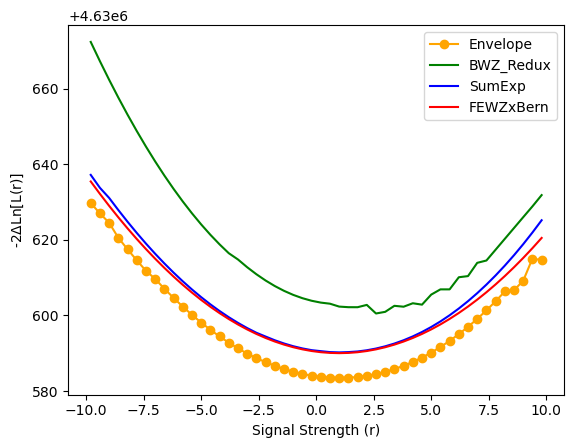

In [15]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope_V2.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0_V2.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1_V2.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2_V2.MultiDimFit.mH125.root",

}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    print(f"x_arr: {(x_arr)}")
    print(f"y_arr: {y_arr}")
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [27]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL -n Envelope_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01  --verbose 2 &> outputV2.log

In [ ]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=0 -n fixed_pdf_0_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=1 -n fixed_pdf_1_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=2 -n fixed_pdf_2_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01      

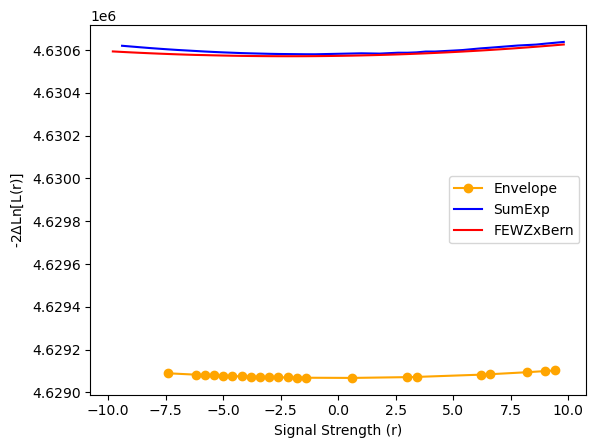

In [29]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope_V2.MultiDimFit.mH125.root",
    # "BWZ_Redux": "./higgsCombinefixed_pdf_0_V2.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1_V2.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2_V2.MultiDimFit.mH125.root",

}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()